## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import os, sys
sys.path.insert(1, os.path.relpath("../functions"))
from fitting import *
from plotting import *


_FOLDER = "../data/"
_FOLDER_2 = "../figures/"
_FOLDER_3 = "../results/"

## Fitting data

In [2]:
df = pd.read_csv(_FOLDER_3+"filt_auc_04.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r', 'count_missing'],
      dtype='object')

### sigmoid_4_param

In [3]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 24164/24164 [02:26<00:00, 164.88it/s]


<function sigmoid_4_param at 0x7ff6af2d4b70>
R2>0: (22253, 33)
R2>0.9 19223
Number of samples with fitting <0.1: 1492

CPU times: user 2min 22s, sys: 10.1 s, total: 2min 32s
Wall time: 2min 26s


Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


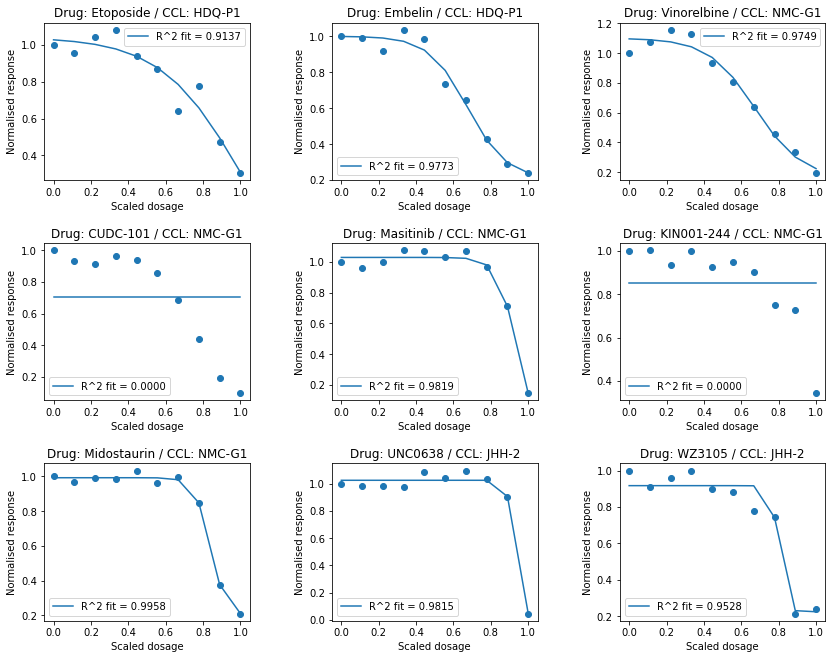

In [4]:
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_2_param

100%|██████████| 22253/22253 [00:35<00:00, 628.35it/s]


<function sigmoid_2_param at 0x7ff6af2d47b8>
R2>0: (22253, 35)
R2>0.9 16723
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 35 s, sys: 1.33 s, total: 36.3 s
Wall time: 35.7 s


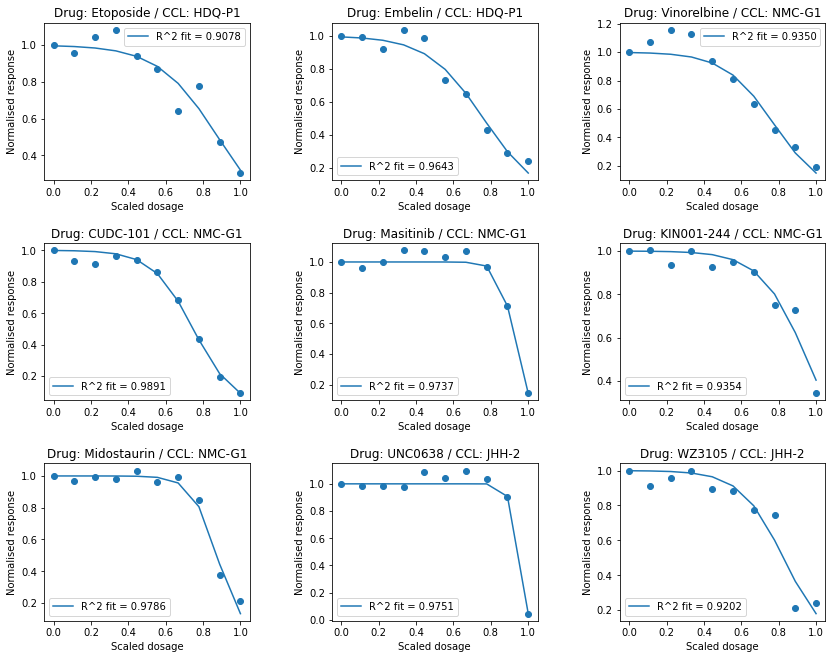

In [5]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 22253/22253 [00:58<00:00, 382.98it/s]


<function sigmoid_3_param at 0x7ff6af2d4ae8>
R2>0: (22244, 37)
R2>0.9 19662
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 57.3 s, sys: 2.26 s, total: 59.5 s
Wall time: 58.4 s


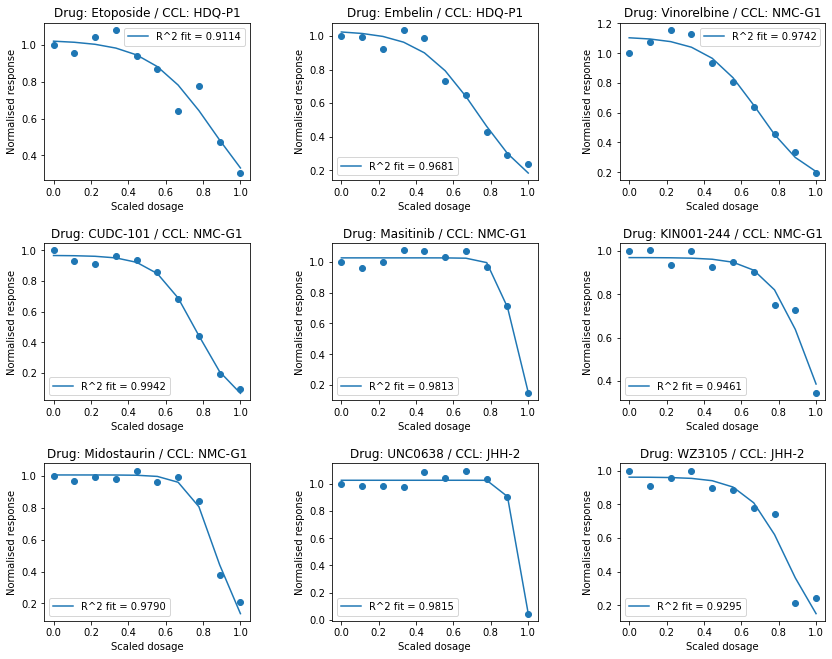

In [6]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 22244/22244 [00:39<00:00, 567.41it/s]


<function fsigmoid at 0x7ff6af2d4a60>
(22244, 39)
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


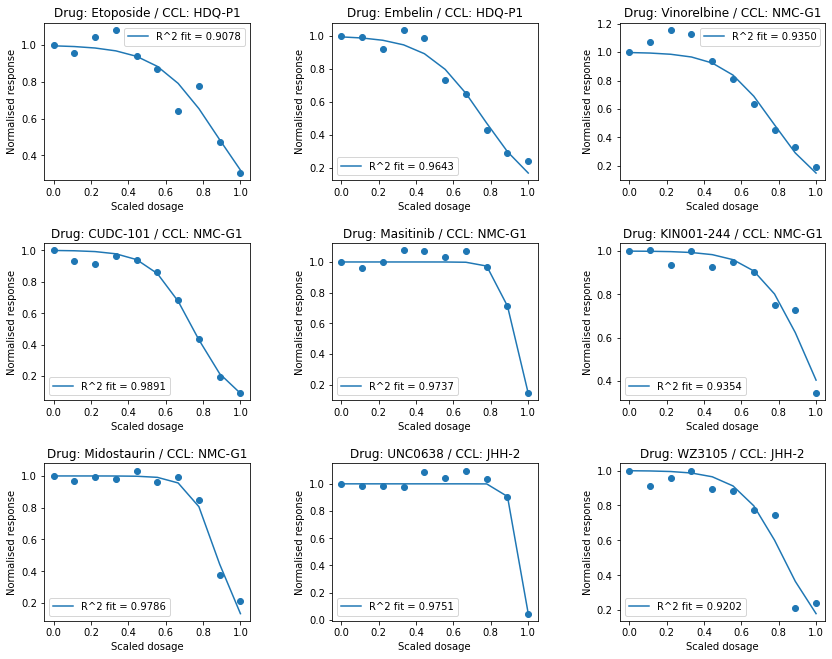

In [7]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 22244/22244 [01:31<00:00, 244.39it/s]


<function logistic_4_param at 0x7ff6af2d4d08>
R2>0: (22239, 41)
R2>0.9 20516
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 1min 24s, sys: 4.39 s, total: 1min 28s
Wall time: 1min 31s


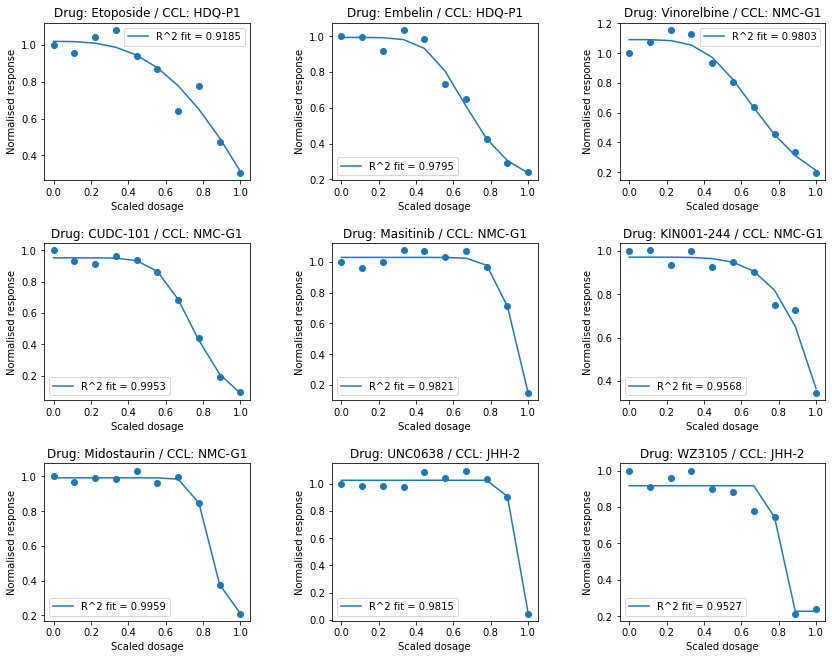

In [8]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

In [9]:
df[df["logistic_4_param_r2"]>0.9][["logistic_4_param", "logistic_4_param_r2"]]

,logistic_4_param,logistic_4_param_r2
0,"[1.0201798828480437, 2.9899081457489403, 1.658...",0.918478
2,"[0.9939833004364438, 5.824692728616541, 0.6878...",0.979466
3,"[1.0907829029342455, 4.37405617935342, 0.71688...",0.980306
4,"[0.9519836581555603, 7.388688379082729, 0.7625...",0.995272
5,"[1.029750341406344, 15.444637700082398, 0.9587...",0.982129
...,...,...
24159,"[1.0032752536227794, 3.237150813605707, 0.6536...",0.995870
24160,"[1.1017511824107695, 8.564519425745242, 1.0356...",0.961045
24161,"[1.1320658135141435, 6.560876349283483, 0.5562...",0.955328
24162,"[0.9525198160474172, 5.139545231414677, 1.9749...",0.936438


### LL4_4_param

100%|██████████| 22239/22239 [01:40<00:00, 221.69it/s]


<function ll4_4_param at 0x7ff6af2d4bf8>
R2>0: (22238, 43)
R2>0.9 20515
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 1min 37s, sys: 4.77 s, total: 1min 42s
Wall time: 1min 40s


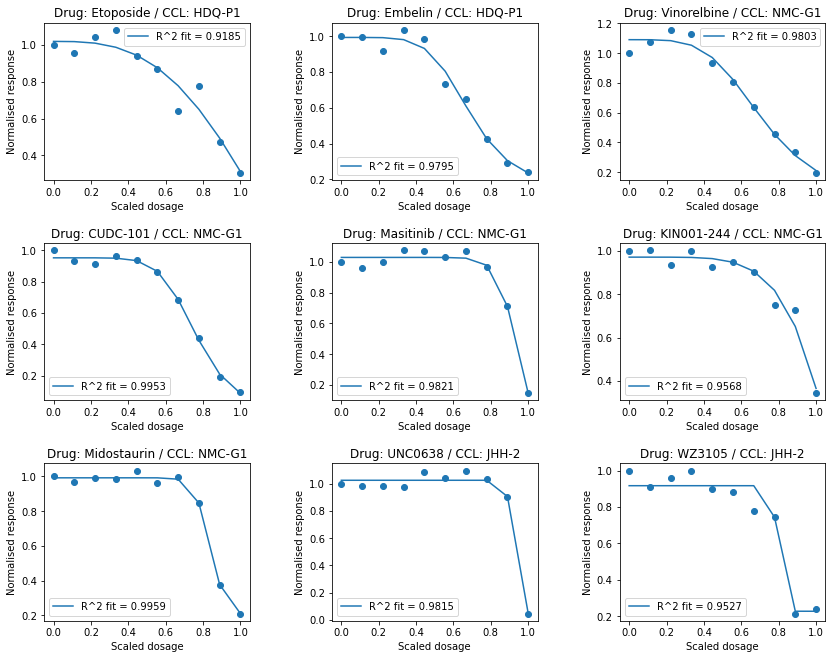

In [10]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 22238/22238 [01:27<00:00, 254.03it/s]


<function ll4R_4_param at 0x7ff6af2d4c80>
R2>0: (22237, 45)
R2>0.9 20498
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 1min 26s, sys: 4.19 s, total: 1min 30s
Wall time: 1min 28s


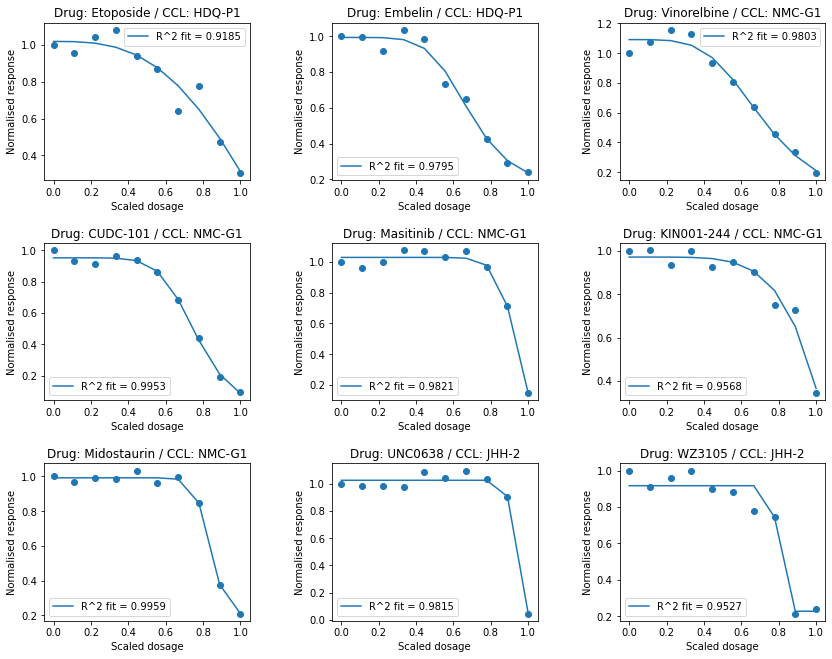

In [11]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 22237/22237 [01:50<00:00, 201.13it/s]


<function logLogist_3_param at 0x7ff6af2d4d90>
R2>0: (22225, 47)
R2>0.9 19769
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 1min 46s, sys: 5.51 s, total: 1min 52s
Wall time: 1min 50s


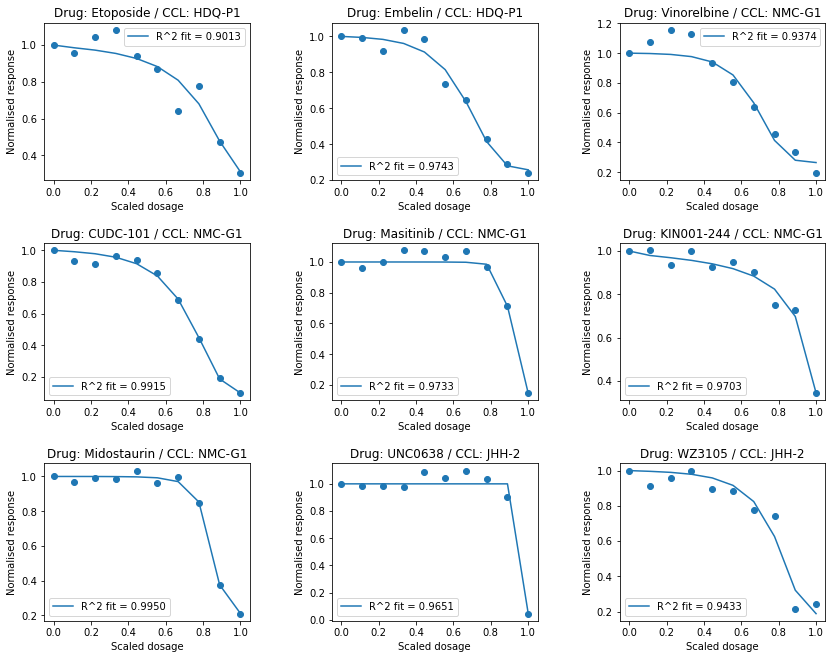

In [12]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [13]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [14]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,sigmoid_4_param_r2,sigmoid_2_param_r2,fsigmoid_r2,logLogist_3_param_r2,ll4R_4_param_r2,ll4_4_param_r2,sigmoid_3_param_r2,logistic_4_param_r2,better_fitting
0,9.136833e-01,0.907841,0.907841,0.901337,0.918464,0.918474,0.911393,0.918478,logistic_4_param
2,9.773357e-01,0.964311,0.964311,0.974261,0.979466,0.979466,0.968081,0.979466,ll4_4_param
3,9.749048e-01,0.935012,0.935012,0.937392,0.980302,0.980305,0.974226,0.980306,logistic_4_param
4,4.094162e-08,0.989093,0.989093,0.991522,0.995272,0.995272,0.994160,0.995272,logistic_4_param
5,9.819163e-01,0.973737,0.973737,0.973334,0.982129,0.982129,0.981304,0.982129,logistic_4_param


In [15]:
df["better_fitting"].value_counts()

logLogist_3_param    6460
sigmoid_4_param      6119
logistic_4_param     3280
ll4_4_param          3227
ll4R_4_param         2797
sigmoid_3_param       342
Name: better_fitting, dtype: int64

In [16]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
ll4_4_param,10072
logistic_4_param,10067
ll4R_4_param,10039
sigmoid_4_param,9682
logLogist_3_param,8480
sigmoid_3_param,6961
fsigmoid,4437
sigmoid_2_param,4385


In [17]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
ll4_4_param,16851
logistic_4_param,16850
ll4R_4_param,16823
sigmoid_4_param,15919
logLogist_3_param,15598
sigmoid_3_param,14520
fsigmoid,10955
sigmoid_2_param,10879


In [18]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
ll4_4_param,20506
logistic_4_param,20506
ll4R_4_param,20489
logLogist_3_param,19769
sigmoid_3_param,19650
sigmoid_4_param,19201
fsigmoid,16771
sigmoid_2_param,16713


In [19]:
df.shape

(22225, 48)

In [20]:
df.to_csv(_FOLDER_3+"fit_auc_04.csv", index=False)